In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import random

from transformers.models.deprecated.deta.image_processing_deta import prepare_coco_detection_annotation

# 加载数据集
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)




通过torchvision扩展库来从互联网上自动下载加载FashionMINST数据集，并且把他保存在脚本的同目录下。

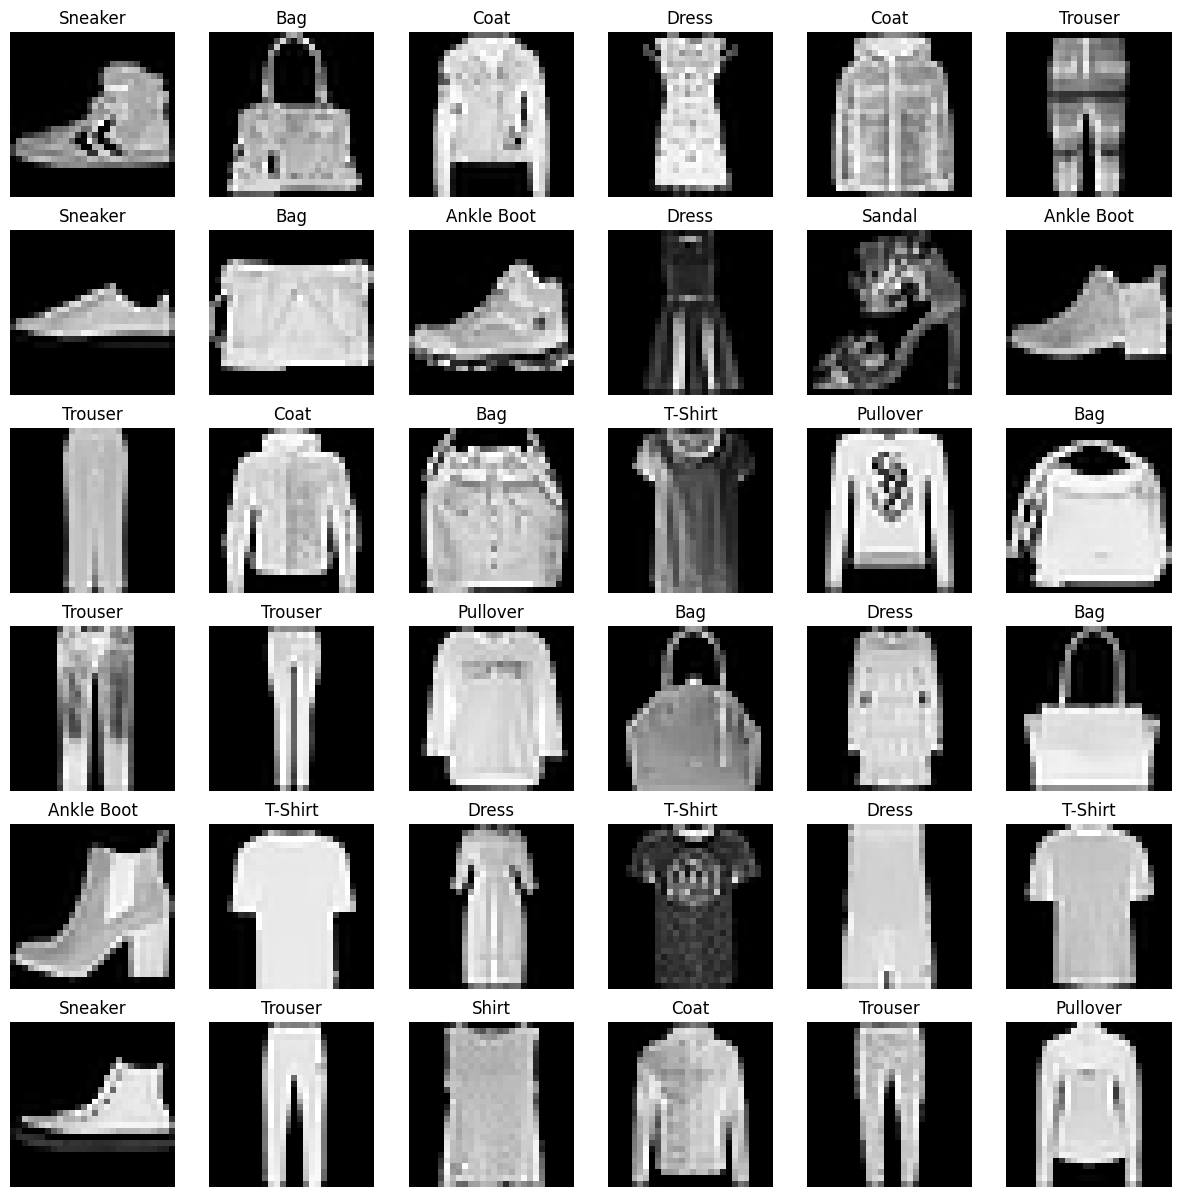

In [3]:
# 迭代和可视化数据集
import random
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}

figure = plt.figure(figsize=(15, 15))
cols, rows = 6, 6
for i in range(1, cols * rows + 1):
    sample_idx = random.randint(0, len(train_data) - 1)
    # sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()



通过for循环对数据集进行迭代和可视化：
1：定义一个字典，将标签的数字索引映射成对应的物品名称。
2：通过matplotlib库定义一个画布。
3：定义子图的行和列，也就是子图的数量。
4：利用for循环，插入子图方向是自上而下，自左往右：
    a：通过torch.randint从数据集中随意抽取一个索引，并且将他变成一个一维单元素数组，然后在通过item()方法把数组变成python的数字对象。就是上一单元所学习的方法。其实还可以用random库的randint方法也可以，这样就不需要把张量变成数字了。
    b：将索引传入数据集，获取对应的图片和标签信息。
    c：将图片按照行和列的顺序插入画布。
    d：将标签类别映射到前面创建到字典的值，并把值作为该图片的名称。
    e：关闭坐标轴，方便观察。
    f：根据图片的类型，清除图片多余维度的通道，方便plt输入渲染。并且图片以灰色的图像呈现。
5：展示填充完成的画布。

In [3]:
# 为自己的文件创建自定义数据集
import os
import pandas as pd
from torchvision.io import read_image


class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label





In [9]:
# 创建图片对应的csv文件
data = {
    'image': ['test1_cat.jpg', 'test2_cat.jpg', 'test3_lion.jpg', 'test4_tiger.jpg'],
    'id': [0, 1, 2, 3]
}

df = pd.DataFrame(data)

df.to_csv('PyTorch_code_3_labels.csv', index=False, sep=',')


In [12]:
# 将图片转换成张量
instance = CustomImageDataset(annotations_file='PyTorch_code_3_labels.csv', img_dir='PyTorch_code_3_image_dir')

imgData_len = instance.__len__()
print(f"数据集的长度为： {imgData_len}")
print("\n")
print("-" * 70)
for idx in range(4):
    image, label = instance.__getitem__(idx)
    print(f"label: {label} ---> image: \n{image}")





数据集的长度为： 4


----------------------------------------------------------------------
label: 0 ---> image: 
tensor([[[163, 163, 163,  ..., 174, 174, 175],
         [162, 162, 163,  ..., 173, 173, 174],
         [161, 162, 162,  ..., 172, 172, 173],
         ...,
         [140, 140, 141,  ...,  71,  70,  70],
         [140, 141, 143,  ...,  72,  71,  70],
         [143, 140, 138,  ...,  71,  71,  71]],

        [[169, 169, 169,  ..., 181, 181, 182],
         [168, 168, 169,  ..., 180, 180, 181],
         [167, 168, 168,  ..., 179, 179, 180],
         ...,
         [144, 144, 145,  ...,  39,  38,  38],
         [143, 145, 146,  ...,  40,  39,  38],
         [146, 143, 141,  ...,  39,  39,  39]],

        [[181, 181, 181,  ..., 191, 191, 192],
         [180, 180, 181,  ..., 190, 190, 191],
         [179, 180, 180,  ..., 189, 189, 190],
         ...,
         [147, 147, 148,  ...,   1,   0,   0],
         [148, 148, 151,  ...,   2,   1,   0],
         [153, 148, 148,  ...,   1,   1,   1]]], 

In [7]:
image_path = 'PyTorch_code_3_image_dir/test1_cat.jpg'

if os.path.exists(image_path):
    print("Yes")
else:
    print("No")


Yes


In [22]:
data = {
    'name': ['aliz', 'stdio'],
    'age': [12, 10]
}

df = pd.DataFrame(data)
df.to_csv('test_code_3.csv', sep=",", index=False)

csv_path = 'test_code_3.csv'

t = pd.read_csv(csv_path)
l = t.iloc[0,0]
print(l)


aliz


创建一个类 CustomImageData(Dataset) 来将自己的图片转换成torch可以处理的三维张量形式。值得注意的是，在使用pandas库的.iloc方法对csv文件进行索引操作时，sep参数不能使用除","以外的用来分隔，不然索引的时候会将整行的内容全部取出包括分隔符号。而且索引也算在查询的范围，索引需要把索引关掉以免造成影响。但是表头不会造成影响。
使用pandas创建csv文件的方法：
1: 先创建一个字典 data = {"a": [x, x, x, ....], "b": [y, y, y, y,....]} 这种格式。
2：然后再把他转换成df对象， df = pd.DataFrame(data).
3: 将df写入csv文件 df.to_csv("file_path", sep="split_char", index="False/True", header="False/True")

对csv文件进行索引：
1：读取csv文件 f = pd.read_csv(path)。
2：进行索引 demo = f.iloc[x, y] 。


In [25]:
# 准备数据以使用DataLoader进行训练
from torch.utils.data import DataLoader

# 为训练集生成可迭代对象。
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
# 为验证集生成可迭代对象。
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


DataLoader的功能就类似于洗牌和发牌。DataLoader会根据batch_size的大小将数据集分成多份，形成一个可迭代对象。开启shuffle参数后每结束一轮就会将顺序打乱，防止模型对顺序产生依赖。

In [1]:
# 遍历DataLoader

# features 容貌/特征
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")




NameError: name 'train_dataloader' is not defined